# 数据增强

In [1]:
#-*- coding: utf-8 -*-
import numpy as np
import torch
import os
import cv2
from PIL import Image
from PIL import ImageDraw
from torchvision import transforms
import time
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
dataset = torch.load('dataset.pt')
m = len(dataset)

In [6]:
index_class60 = {'传单': 0, '充电宝': 1, '包': 2, '塑料玩具': 3, '塑料碗盆': 4, '塑料衣架': 5, '快递纸袋': 6, '报纸': 7, '插头电线': 8, '旧书': 9, '旧衣服': 10, '易拉罐': 11, '杂志': 12, '枕头': 13, '毛绒玩具': 14, '泡沫塑料': 15, '洗发水瓶': 16, '牛奶盒等利乐包装': 17, '玻璃': 18, '玻璃瓶罐': 19, '皮鞋': 20, '砧板': 21, '纸板箱': 22, '调料瓶': 23, '酒瓶': 24, '金属食品罐': 25, '锅': 26, '食用油桶': 27, '饮料瓶': 28, '干电池': 29, '废弃水银温度计': 30, '废旧灯管灯泡': 31, '杀虫剂容器': 32, '电池': 33, '软膏': 34, '过期药物': 35, '除草剂容器': 36, '剩菜剩饭': 37, '大骨头': 38, '果壳瓜皮': 39, '残枝落叶': 40, '水果果皮': 41, '水果果肉': 42, '茶叶渣': 43, '菜梗菜叶': 44, '落叶': 45, '蛋壳': 46, '西餐糕点': 47, '鱼骨': 48, '一次性餐具': 49, '化妆品瓶': 50, '卫生纸': 51, '尿片': 52, '污损塑料': 53, '烟蒂': 54, '牙签': 55, '破碎花盆及碟碗': 56, '竹筷': 57, '纸杯': 58, '贝壳': 59}

[ 582.  448.  514.  739.  462.  491.  283.  718.  643.  851.  451.  828.
  646.  424.  781.  260.  464.  777.  230. 1262.  485.  479.  939.  496.
  926.  373.  515.  443.  250.  380.   65.   41.   24.   77.  445.  487.
   51.  759.  422.   12.   12.  513.  807.  865. 1642.  613.  450.  662.
  459.  728.  459.   51.   93.  471.  513.  150.  458.  413.  517.  230.]


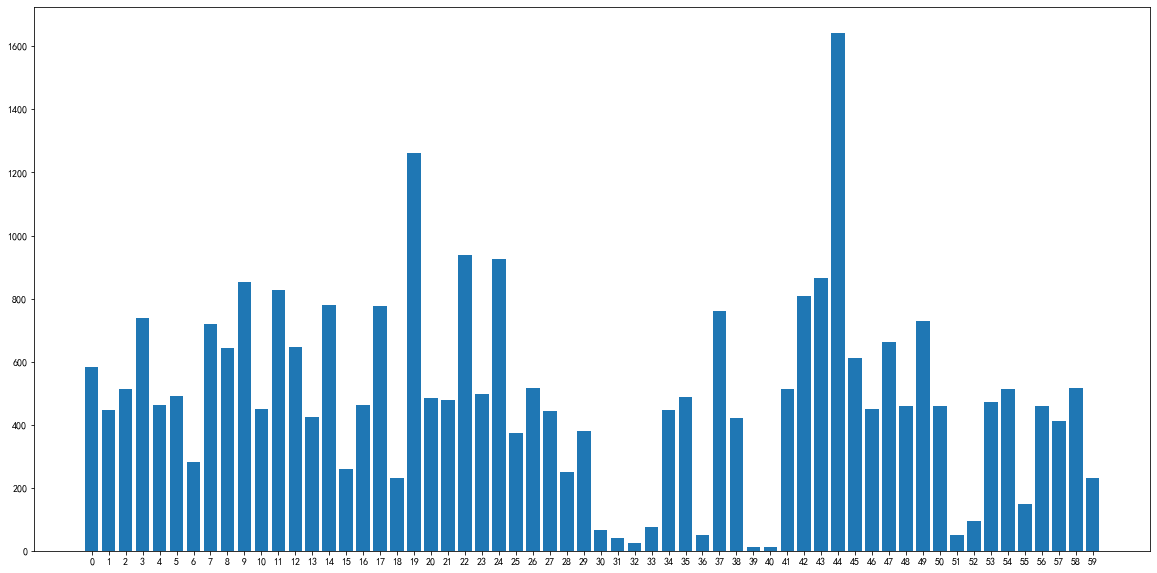

In [7]:
count = np.zeros((len(index_class60)))
for data in dataset:
    count[data[-1]] += 1
#count = count/len(dataset)
print(count)

labels = list(index_class60.values())
plt.figure(figsize=(20,10))
plt.bar(range(len(count)), count, tick_label=labels)
plt.show()

In [9]:
# # Flipped Horizontally 水平翻转
# h_flip = cv2.flip(image, 1)
# # Flipped Vertically 垂直翻转
# v_flip = cv2.flip(image, 0)
class Brightness:
    def __init__(self,brightness_factor):
        self.brightness_factor=brightness_factor
    def __call__(self, img):
        return np.uint8(np.clip((self.brightness_factor * img + 125*(1-self.brightness_factor)), 0, 255))
        

0


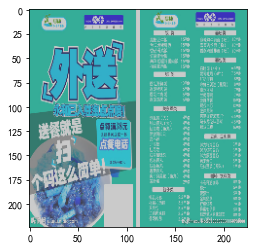

In [10]:
img = dataset[1][0].numpy()
brightness=Brightness(0.6)
img=brightness(img)
plt.imshow(img)
print(dataset[1][1])

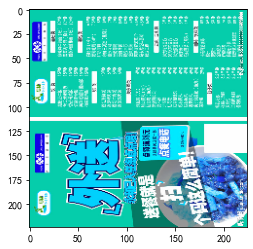

In [11]:
img = dataset[1][0].numpy()
rows,cols=img.shape[:2]
M=cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
img=cv2.warpAffine(img,M,(cols,rows))
plt.imshow(img)

In [39]:
dataset_t = []
for i in range(len(dataset)):
    if (count[dataset[i][1]] <= 300): #对样本数比较少的类别进行数据增强
        print(i)

        img=cv2.flip(dataset[i][0].numpy(),1)
        dataset_t.append([torch.from_numpy(img),dataset[i][1]])

        img=cv2.flip(dataset[i][0].numpy(),0)
        dataset_t.append([torch.from_numpy(img),dataset[i][1]])

        img = dataset[i][0].numpy()
        brightness=Brightness(0.6)
        img=brightness(img)
        dataset_t.append([torch.from_numpy(img),dataset[i][1]])

        img = dataset[i][0].numpy()
        brightness=Brightness(1.4)
        img=brightness(img)
        dataset_t.append([torch.from_numpy(img),dataset[i][1]])

        img = dataset[i][0].numpy()
        rows,cols=img.shape[:2]
        M=cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
        img=cv2.warpAffine(img,M,(cols,rows))
        dataset_t.append([torch.from_numpy(img),dataset[i][1]])
    

3236
3237
3238
3239
3240
3241
3242
3243
3244
3245
3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435


鱼骨


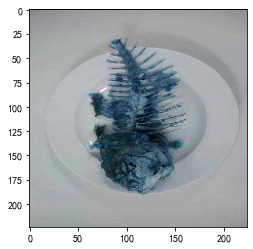

In [37]:
index_class60_reverse = dict(zip(index_class60.values(), index_class60.keys()))
i = np.random.randint(len(dataset_t))
plt.imshow(dataset_t[i][0])
print(index_class60_reverse[dataset_t[i][-1]])

In [40]:
new_dataset = dataset+dataset_t
len(new_dataset)

38774

[ 582.  448.  514.  739.  462.  491. 1698.  718.  643.  851.  451.  828.
  646.  424.  781. 1560.  464.  777. 1380. 1262.  485.  479.  939.  496.
  926.  373.  515.  443. 1500.  380.  390.  246.  144.  462.  445.  487.
  306.  759.  422.   72.   72.  513.  807.  865. 1642.  613.  450.  662.
  459.  728.  459.  306.  558.  471.  513.  900.  458.  413.  517. 1380.]


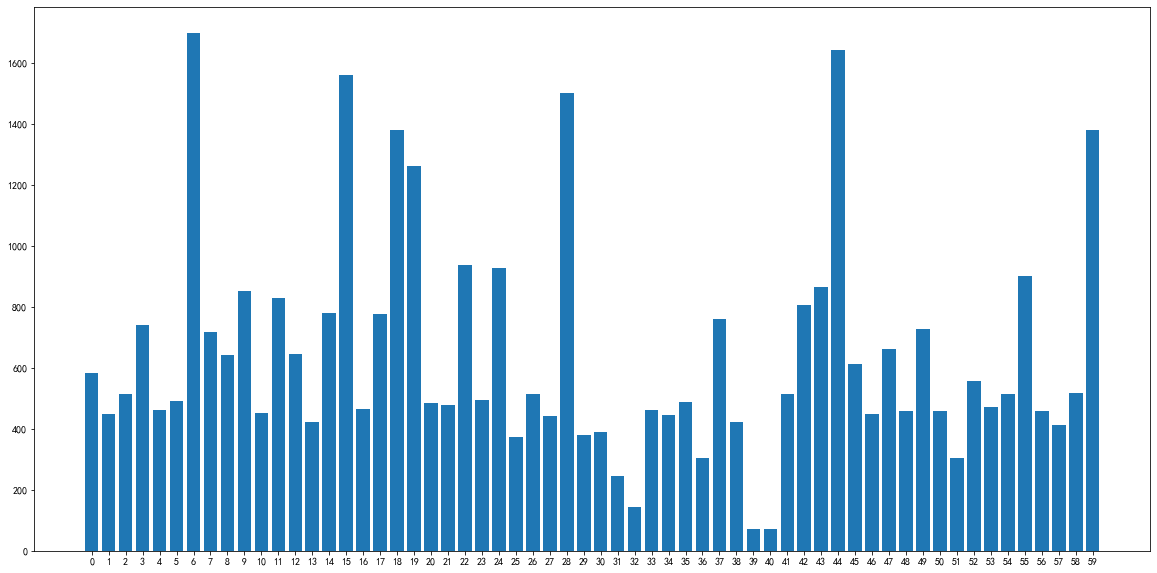

In [41]:
count = np.zeros((len(index_class60)))
for data in new_dataset:
    count[data[-1]] += 1
#count = count/len(dataset)
print(count)

labels = list(index_class60.values())
plt.figure(figsize=(20,10))
plt.bar(range(len(count)), count, tick_label=labels)
plt.show()

In [42]:
torch.save(new_dataset,'dataset_new.pt')

In [ ]:
new_dataset = torch.load('dataset_new.pt')